In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta


In [2]:
# Step 1: Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [3]:
# Step 2: Create sales table if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
""")

In [4]:
# Step 3: Check if data exists, if not insert 100 random rows
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    products = ["Laptop", "Phone", "Tablet", "Headphones", "Monitor", "Keyboard", "Mouse"]
    for _ in range(100):
        product = random.choice(products)
        quantity = random.randint(1, 10)
        price = round(random.uniform(50, 1500), 2)
        sale_date = datetime.now() - timedelta(days=random.randint(0, 365))
        cursor.execute(
            "INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)",
            (product, quantity, price, sale_date.strftime("%Y-%m-%d"))
        )
    conn.commit()
    print("Inserted 100 random sales records.")

Inserted 100 random sales records.


In [5]:
# Step 4: Run SQL queries

# 4.1 Total quantity and revenue per product
query_summary = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df_summary = pd.read_sql_query(query_summary, conn)

# 4.2 Month-wise revenue
query_month = """
SELECT strftime('%Y-%m', sale_date) AS month,
       SUM(quantity * price) AS monthly_revenue
FROM sales
GROUP BY month
ORDER BY month
"""
df_month = pd.read_sql_query(query_month, conn)


In [6]:
# Step 5: Display results
print("\n=== Sales Summary by Product ===")
print(df_summary)

print("\n=== Monthly Revenue ===")
print(df_month)


=== Sales Summary by Product ===
      product  total_qty   revenue
0  Headphones         59  31570.96
1    Keyboard         69  60392.52
2      Laptop         47  32462.59
3     Monitor        111  84352.10
4       Mouse         73  37765.30
5       Phone         82  58148.74
6      Tablet         72  49011.25

=== Monthly Revenue ===
      month  monthly_revenue
0   2024-09         15094.56
1   2024-10         22620.07
2   2024-11         44193.53
3   2024-12         29032.97
4   2025-01         43229.54
5   2025-02         21426.23
6   2025-03         33896.69
7   2025-04         13253.03
8   2025-05         49873.27
9   2025-06         28350.51
10  2025-07         23521.80
11  2025-08         29211.26


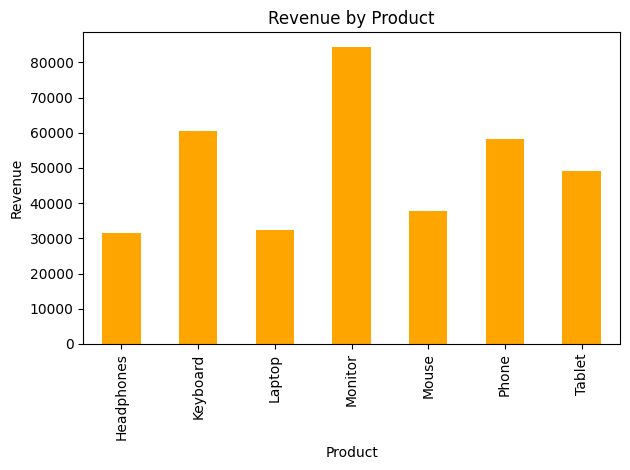

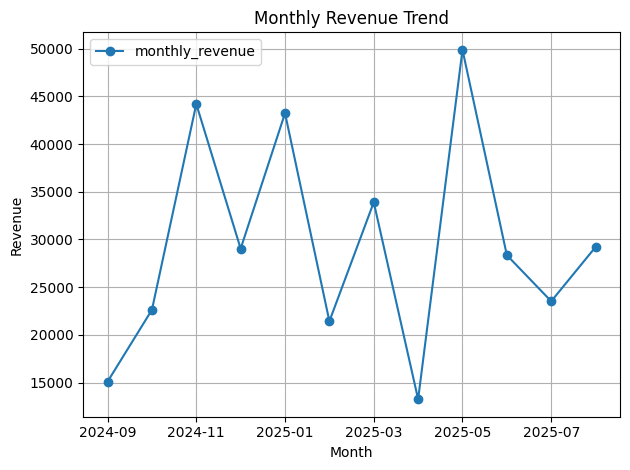

In [7]:
# Step 6: Plot charts
# Chart 1: Revenue by product
df_summary.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("revenue_by_product.png")
plt.show()

# Chart 2: Monthly revenue trend
df_month.plot(kind='line', x='month', y='monthly_revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_revenue.png")
plt.show()


In [8]:
# Step 7: Close connection
conn.close()
print("\nAnalysis complete. Charts saved as 'revenue_by_product.png' and 'monthly_revenue.png'.")


Analysis complete. Charts saved as 'revenue_by_product.png' and 'monthly_revenue.png'.
